# SENG 474
# Assignment 1 - Problem 1
# Nolan Kurylo
# V00893175

To execute notebook, ensure ALL cells are run from top to bottom (since imports/df creation are only called once)


References (these were also used for most of the following problems):

1) https://pandas.pydata.org/pandas-docs/stable/reference/index.html

2) https://numpy.org/doc/stable/reference/

3) https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html




In [2]:
# 1.1 Bad Data


import pandas as pd
import numpy as np
from matplotlib import pyplot

np.random.seed(1337)

df = pd.read_csv('combined_data.csv') # create dataframe of csv
bad_data = r'<bound method Series\.mean.*' #regex of nonsensical cells

num_bad_cells = 0
for col in df.columns: # find the number of nonsensical cells in the df
    num_bad_cells = num_bad_cells + df[col].astype(str).str.contains(bad_data).sum()


df.replace(to_replace=bad_data, value=0, regex=True, inplace=True) # replace cells with vale of 0

print("Number of nonsensical cells: " + str(num_bad_cells))



Number of nonsensical cells: 5


In [3]:
# 1.2 Split

df['fips'] = df['fips'].astype(str).str.zfill(5) # ensure leading 0's are prepended for 4 digit codes (lost front 0 in conversion from int to str)

df['State'] = df['fips'].astype(str).str[0:2]
df['County'] = df['fips'].astype(str).str[2:5]

df.drop('fips', 1, inplace=True) # drop "fips" column

print("The new FIPS columns:")
print(df['State'].describe())
print(df['County'].describe())



The new FIPS columns:
count     3145
unique      51
top         48
freq       254
Name: State, dtype: object
count     3145
unique     327
top        003
freq        49
Name: County, dtype: object


In [4]:
# 1.3 Aggregate

educational_features = ["Percent of adults with less than a high school diploma, 2011-2015","Percent of adults with a high school diploma only, 2011-2015","Percent of adults completing some college or associate's degree, 2011-2015","Percent of adults with a bachelor's degree or higher, 2011-2015"] # list of columns to aggregate
df['Education'] = df[educational_features].idxmax(axis=1) # insert the column name of the column with max entries for education-based features

# Adjust names to make more sense
df.replace(to_replace=educational_features[0], value="Less than High School Diploma", regex=True, inplace=True)
df.replace(to_replace=educational_features[1], value="High School Diploma Only", regex=True, inplace=True)
df.replace(to_replace=educational_features[2], value="Some college or associate's degree", regex=True, inplace=True)
df.replace(to_replace=educational_features[3], value="bachelor's degree or higher", regex=True, inplace=True)

print("The new Education column:")
print(df['Education'].describe())
print()

religion_features = ["Amish","Buddhist","Catholic","Christian Generic","Eastern Orthodox","Hindu","Jewish","Mainline Christian","Mormon","Muslim","Non-Catholic Christian","Other","Other Christian","Other Misc","Pentecostal / Charismatic","Protestant Denomination","Zoroastrian"] # list of columns to aggregate
df['Religion'] = df[religion_features].idxmax(axis=1) # insert the column name of the column with max entries for religion-based features

print("The new Religion column:")
print(df['Religion'].describe())
print()

young_features = ['0-4_rate','5-9_rate','10-14_rate','15-19_rate']# list of columns to aggregate
adult_features = ['20-24_rate','25-29_rate','30-34_rate','35-39_rate','40-44_rate','45-49_rate','50-54_rate','55-59_rate','60-64_rate']# list of columns to aggregate
old_features = ['65-69_rate','70-74_rate','75-79_rate','80-84_rate','85+_rate']# list of columns to aggregate

df['Young'] = df[young_features].sum(axis=1) # create new column for number of people that are 'Young'
df['Adult'] = df[adult_features].sum(axis=1)  # create new column for number of people that are 'Adult'
df['Old'] = df[old_features].sum(axis=1) # create new column for number of people that are 'Old'

print("The new Young column:")
print(df['Young'].describe())
print()
print("The new Adult column:")
print(df['Adult'].describe())
print()
print("The new Old column:")
print(df['Old'].describe())
print()

ethnic_male_features = ['WHITE_MALE_rate', 'BLACK_MALE_rate', 'NATIVE_AMERICAN_MALE_rate', 'ASIAN_MALE_rate', 'HAWAIIAN_PACIFIC_MALE_rate', 'MULTI_MALE_rate']
df['EthnicMale'] = df[ethnic_male_features].idxmax(axis=1) # insert the column name of the column with max entries for ethnicity of males

print("The new EthnicMale column:")
print(df['EthnicMale'].describe())
print()


# Adjust names to make more sense
df.replace(to_replace=ethnic_male_features[0], value="White male", regex=True, inplace=True)
df.replace(to_replace=ethnic_male_features[1], value="Black male", regex=True, inplace=True)
df.replace(to_replace=ethnic_male_features[2], value="Native American male", regex=True, inplace=True)
df.replace(to_replace=ethnic_male_features[3], value="Asian male", regex=True, inplace=True)
df.replace(to_replace=ethnic_male_features[4], value="Hawaiian Pacific male", regex=True, inplace=True)
df.replace(to_replace=ethnic_male_features[5], value="Multi male", regex=True, inplace=True)


ethnic_female_features = ['WHITE_FEMALE_rate','BLACK_FEMALE_rate','NATIVE_AMERICAN_FEMALE_rate','ASIAN_FEMALE_rate','HAWAIIAN_PACIFIC_FEMALE_rate','MULTI_FEMALE_rate']
df['EthnicFemale'] = df[ethnic_female_features].idxmax(axis=1) # insert the column name of the column with max entries for ethnicity of males

print("The new EthnicFemale column:")
print(df['EthnicFemale'].describe())
print()

# Adjust names to make more sense
df.replace(to_replace=ethnic_female_features[0], value="White female", regex=True, inplace=True)
df.replace(to_replace=ethnic_female_features[1], value="Black female", regex=True, inplace=True)
df.replace(to_replace=ethnic_female_features[2], value="Native American female", regex=True, inplace=True)
df.replace(to_replace=ethnic_female_features[3], value="Asian female", regex=True, inplace=True)
df.replace(to_replace=ethnic_female_features[4], value="Hawaiian Pacific female", regex=True, inplace=True)
df.replace(to_replace=ethnic_female_features[5], value="Multi female", regex=True, inplace=True)


# Remove old columns
df.drop(educational_features, 1, inplace=True) 
df.drop(religion_features, 1, inplace=True) 
df.drop(young_features, 1, inplace=True) 
df.drop(adult_features, 1, inplace=True) 
df.drop(old_features, 1, inplace=True) 
df.drop(ethnic_male_features, 1, inplace=True) 
df.drop(ethnic_female_features, 1, inplace=True) 

# Remove unneeded features
df.drop("PovertyUnder18Pct2014", 1, inplace=True) 
df.drop("Deep_Pov_Children", 1, inplace=True) 
df.drop("Housing units", 1, inplace=True) 
df.drop("age_total_pop", 1, inplace=True) 
df.drop("Area in square miles - Water area", 1, inplace=True) 
df.drop("Area in square miles - Land area", 1, inplace=True) 
df.drop("Density per square mile of land area - Housing units", 1, inplace=True) 

print("All columms after removaL:")
print(df.columns)


The new Education column:
count                         3145
unique                           4
top       High School Diploma Only
freq                          1949
Name: Education, dtype: object

The new Religion column:
count                  3145
unique                    6
top       Christian Generic
freq                   2073
Name: Religion, dtype: object

The new Young column:
count    3145.000000
mean        0.248278
std         0.036314
min         0.078408
25%         0.226811
50%         0.247601
75%         0.266253
max         0.448439
Name: Young, dtype: float64

The new Adult column:
count    3145.000000
mean        0.570367
std         0.033058
min         0.373106
25%         0.550369
50%         0.570842
75%         0.589605
max         0.729594
Name: Adult, dtype: float64

The new Old column:
count    3145.000000
mean        0.121577
std         0.032985
min         0.028765
25%         0.099357
50%         0.118563
75%         0.139039
max         0.370196
Name: Ol

In [5]:
# Problem 1 - 4. Rename
df.rename({'votes': 'Votes', 'Unemployment_rate_2015':'UnemploymentRate2015','POP_ESTIMATE_2015': 'PopEstimate2015', 'Med HHInc2014':'MedHHInc2014', 'Per Capita Inc': 'PerCapitaInc', 'Deep_Pov_All': 'PovertyLevel','Area in square miles - Total area': 'TotalAreaSqM', 'Density per square mile of land area - Population': 'PopDensity', 'TOT_MALE_rate':'TotMaleRate', 'TOT_FEMALE_rate':'TotFemaleRate', 'WHITE_rate':'WhiteRate', 'BLACK_rate':'BlackRate', 'NATIVE_AMERICAN_rate':'NativeAmericanRate', 'HAWAIIAN_PACIFIC_rate':'HawaiianPacificRate', 'MULTI_rate':'MultiRate','voter_turnout_rate':'VoterTurnoutRate', 'Ethnic Male':'EthnicMale', 'Ethic Female':'EthnicFemale', 'Housing units': 'HousingUnits'}, axis=1, inplace=True)

print("All columns after being renamed:")
print(df.columns)



All columns after being renamed:
Index(['Votes', 'UnemploymentRate2015', 'PopEstimate2015', 'MedHHInc2014',
       'PerCapitaInc', 'PovertyAllAgesPct2014', 'PovertyLevel', 'Population',
       'TotalAreaSqM', 'PopDensity', 'TotMaleRate', 'TotFemaleRate',
       'WhiteRate', 'BlackRate', 'NativeAmericanRate', 'HawaiianPacificRate',
       'MultiRate', 'VoterTurnoutRate', 'Democrat', 'State', 'County',
       'Education', 'Religion', 'Young', 'Adult', 'Old', 'EthnicMale',
       'EthnicFemale'],
      dtype='object')


In [6]:
# 1.5 Normalize
# Normalize all population, income and area related features (6 total)
df['PerCapitaInc'] = (df['PerCapitaInc'] - df['PerCapitaInc'].mean())/df['PerCapitaInc'].std()
df['MedHHInc2014'] = (df['MedHHInc2014'] - df['MedHHInc2014'].mean())/df['MedHHInc2014'].std()
df['PopEstimate2015'] = (df['PopEstimate2015'] - df['PopEstimate2015'].mean())/df['PopEstimate2015'].std()
df['Population'] = (df['Population'].astype(int) - df['Population'].astype(int).mean())/df['Population'].astype(int).std()
df['TotalAreaSqM'] = (df['TotalAreaSqM'] - df['TotalAreaSqM'].mean())/df['TotalAreaSqM'].std()
df['PopDensity'] = (df['PopDensity'] - df['PopDensity'].mean())/df['PopDensity'].std()

print("The new PerCapitaInc column:")
print(df['PerCapitaInc'].describe())
print()
print("The new MedHHInc2014 column:")
print(df['MedHHInc2014'].describe())
print()
print("The new PopEstimate2015 column:")
print(df['PopEstimate2015'].describe())
print()
print("The new Population column:")
print(df['Population'].describe())
print()
print("The new TotalAreaSqM column:")
print(df['TotalAreaSqM'].describe())
print()
print("The new PopDensity column:")
print(df['PopDensity'].describe())
print()

# Ensure all rate features are on 0-1 scale (4 total)
df['UnemploymentRate2015'] = df['UnemploymentRate2015'] / 100
df['VoterTurnoutRate'] = df['VoterTurnoutRate'] / 100
df['PovertyAllAgesPct2014'] = df['PovertyAllAgesPct2014'] / 100
df['PovertyLevel'] = df['PovertyLevel'] / 100


print("The new UnemploymentRate2015 column:")
print(df['UnemploymentRate2015'].describe())
print()
print("The new VoterTurnoutRate column:")
print(df['VoterTurnoutRate'].describe())
print()
print("The new PovertyAllAgesPct2014 column:")
print(df['PovertyAllAgesPct2014'].describe())
print()
print("The new PovertyLevel column:")
print(df['PovertyLevel'].describe())
print()



The new PerCapitaInc column:
count    3.145000e+03
mean    -5.422266e-16
std      1.000000e+00
min     -2.781910e+00
25%     -6.644255e-01
50%     -1.191829e-01
75%      4.784971e-01
max      6.935650e+00
Name: PerCapitaInc, dtype: float64

The new MedHHInc2014 column:
count    3.145000e+03
mean    -2.168906e-16
std      1.000000e+00
min     -2.106847e+00
25%     -6.802147e-01
50%     -1.565321e-01
75%      4.507249e-01
max      6.488410e+00
Name: MedHHInc2014, dtype: float64

The new PopEstimate2015 column:
count    3.145000e+03
mean     2.259277e-18
std      1.000000e+00
min     -3.126906e-01
25%     -2.797866e-01
50%     -2.352555e-01
75%     -1.075193e-01
max      3.039380e+01
Name: PopEstimate2015, dtype: float64

The new Population column:
count    3.145000e+03
mean    -1.581494e-17
std      1.000000e+00
min     -3.138100e-01
25%     -2.784343e-01
50%     -2.312016e-01
75%     -1.011049e-01
max      3.107425e+01
Name: Population, dtype: float64

The new TotalAreaSqM column:
count

In [7]:
# Problem 1 - 6. Summary

print('New Name: PopEstimate2015, Mean: ' + str(df['PopEstimate2015'].mean()) + ', Std: ' + str(df['PopEstimate2015'].std()))
print('New Name: Population, Mean: ' + str(df['Population'].astype('int').mean()) + ', Std: ' + str(df['Population'].astype('int').std()))
correlation = df['PopEstimate2015'].astype('int').corr(df['Population'].astype('int'))
print("Correlation between PopEstimate2015 and Population: " + str(correlation))
if(correlation > 0.9):
    print("PopEstimate2015 and Population are correlated, dropping column:")
    df.drop("PopEstimate2015", 1, inplace=True) 
else:
    print("PopEstimate2015 and Population are not correlated")

print()



PerCapitaIncQ1 = df['PerCapitaInc'].quantile(0.25)
PerCapitaIncQ2 = df['PerCapitaInc'].quantile(0.50)
PerCapitaIncQ3 = df['PerCapitaInc'].quantile(0.75)
PerCapitaIQR = PerCapitaIncQ3 - PerCapitaIncQ1

PovertyAllAgesPct2014Q1 = df['PovertyAllAgesPct2014'].quantile(0.25)
PovertyAllAgesPct2014Q2 = df['PovertyAllAgesPct2014'].quantile(0.50)
PovertyAllAgesPct2014Q3 = df['PovertyAllAgesPct2014'].quantile(0.75)

PovertyAllAgesPct2014IQR = PovertyAllAgesPct2014Q3 - PovertyAllAgesPct2014Q1



print('New Name: PerCapitaInc, Median: ' + str(df['PerCapitaInc'].median()) + ', Quartiles: Q1: ' + str(PerCapitaIncQ1) + ', Q2: ' + str(PerCapitaIncQ2) + ', Q3: ' + str(PerCapitaIncQ3) + ', IQR: ' + str(PerCapitaIQR))
print('New Name: PovertyAllAgesPct2014, Median: ' + str(df['PovertyAllAgesPct2014'].median()) + ', Quartiles: Q1: ' + str(PovertyAllAgesPct2014Q1) + ', Q2: ' + str(PovertyAllAgesPct2014Q2) + ', Q3: ' + str(PovertyAllAgesPct2014Q3) + ', IQR: ' + str(PovertyAllAgesPct2014IQR))
print()

print('Religion Feature Mode: ' + str(df['Religion'].mode()[0]))
print('EthnicMale Feature Mode: ' + str(df['EthnicMale'].mode()[0]))




New Name: PopEstimate2015, Mean: 2.259277379205406e-18, Std: 1.0
New Name: Population, Mean: 0.1246422893481717, Std: 0.8897815837173146
Correlation between PopEstimate2015 and Population: 0.9885961891884645
PopEstimate2015 and Population are correlated, dropping column:

New Name: PerCapitaInc, Median: -0.11918287137552601, Quartiles: Q1: -0.6644255138552705, Q2: -0.11918287137552601, Q3: 0.4784970660869922, IQR: 1.1429225799422627
New Name: PovertyAllAgesPct2014, Median: 0.158, Quartiles: Q1: 0.121, Q2: 0.158, Q3: 0.203, IQR: 0.08200000000000002

Religion Feature Mode: Christian Generic
EthnicMale Feature Mode: White male


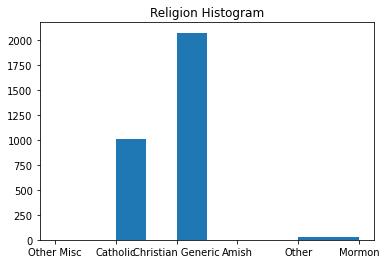

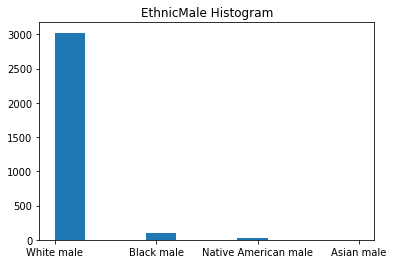

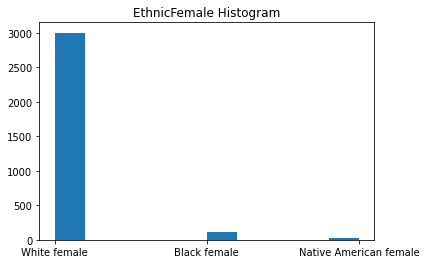

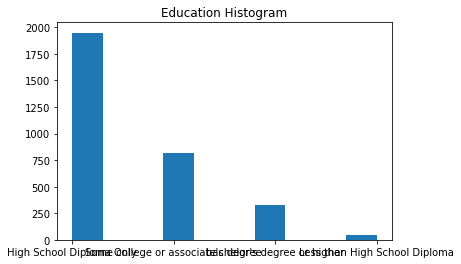

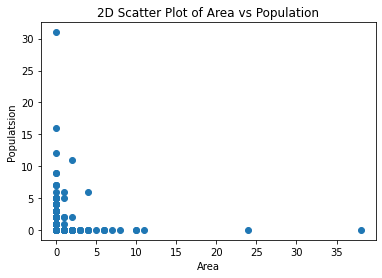

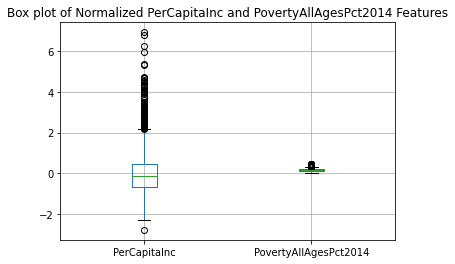

In [8]:
# 1.7 Visualize

pyplot.hist(df['Religion'])
pyplot.title('Religion Histogram')
pyplot.figure()

pyplot.hist(df['EthnicMale'] )
pyplot.title('EthnicMale Histogram')
pyplot.figure()

pyplot.hist(df['EthnicFemale'] )
pyplot.title('EthnicFemale Histogram')
pyplot.figure()

pyplot.hist(df['Education'] )
pyplot.title('Education Histogram')
pyplot.figure()


pyplot.scatter(x=df['TotalAreaSqM'].astype(int), y=df['Population'].astype(int))
pyplot.xlabel('Area')
pyplot.ylabel('Populatsion')
pyplot.title('2D Scatter Plot of Area vs Population')
pyplot.show()

df.boxplot(['PerCapitaInc', 'PovertyAllAgesPct2014'] )
pyplot.title('Box plot of Normalized PerCapitaInc and PovertyAllAgesPct2014 Features')
pyplot.show()



1.8 Conflicts

Conflicts can be seen when two samples in the dataset when all inputs/features are the same but lead to a different output/label. For the elections_clean dataset, a sample is never exactly the same as another because of the continuous features, however, for the remaining problems in the assignment, only categorical features are considered. When continous features are not involved, there a MANY cases when the the data is non-sensical. For example, two contradicting samples look as follows:

Education: bachelor's degree of higher, Religion: Catholic, EthnicMale: White male, EthnicFemale: White female, Democrat: 0

Education: bachelor's degree of higher, Religion: Catholic, EthnicMale: White male, EthnicFemale: White female, Democrat: 1

The problem is that all input are the same but the labels (Democrat) are different -> non-sensical/contradicting samples




Problem 1 - 9. Labels

The label for this dataset is the column 'Democrat'. This is the label vector as all other features are inputs to whether
the county in a specific state is a 'Democrat' representative or not when counting the votes in the federal election. 
With that being said, the label vector is a binary, 0 or 1, (true or false) output; given the 33 cleaned features, each 
row in the dataset outputs whether the county in the state elected a Democrat (1) or non Democrat (0).

In [9]:
# RESULTS
#Remove unnessary columns

df.drop("WhiteRate", 1, inplace=True) 
df.drop("BlackRate", 1, inplace=True)
df.drop("NativeAmericanRate", 1, inplace=True)  
df.drop("HawaiianPacificRate", 1, inplace=True) 
df.drop("MultiRate", 1, inplace=True) 



print("New dataframe is as follows:")
print(df.describe())



# OUTPUT TO CSV: elections_clean.csv
df.to_csv('elections_clean.csv', index=False)

New dataframe is as follows:
              Votes  UnemploymentRate2015  MedHHInc2014  PerCapitaInc  \
count  3.145000e+03           3145.000000  3.145000e+03  3.145000e+03   
mean   4.025041e+04              0.055358 -2.168906e-16 -5.422266e-16   
std    1.061758e+05              0.020226  1.000000e+00  1.000000e+00   
min    6.400000e+01              0.018000 -2.106847e+00 -2.781910e+00   
25%    4.870000e+03              0.042000 -6.802147e-01 -6.644255e-01   
50%    1.073600e+04              0.053000 -1.565321e-01 -1.191829e-01   
75%    2.794100e+04              0.065000  4.507249e-01  4.784971e-01   
max    2.240323e+06              0.240000  6.488410e+00  6.935650e+00   

       PovertyAllAgesPct2014  PovertyLevel    Population  TotalAreaSqM  \
count            3145.000000   3145.000000  3.145000e+03  3.145000e+03   
mean                0.168313      0.070582 -1.581494e-17 -2.259277e-18   
std                 0.064270      0.033496  1.000000e+00  1.000000e+00   
min              